#1. Data set review & preparation

Tujuan :
1. Untuk memahami dataset
2. Untuk mempersiapkan dataset untuk tugas eksplorasi dan prediksi

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [71]:
url = 'https://raw.githubusercontent.com/WiwitWidiyanti/Churn-Prediction-Hotel-Booking/refs/heads/main/Churn_Modelling.csv'
df = pd.read_csv(url)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dataset Description:

1. **RowNumber**: corresponds to the record (row) number and has no effect on the output.
2. **CustomerId**: contains random values and has no effect on customer leaving the bank.
3. **Surname**: the surname of a customer has no impact on their decision to leave the bank.
4. **CreditScore**: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. **Geography**: a customer’s location can affect their decision to leave the bank.
6. **Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. **Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. **Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. **Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
11. **HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. **IsActiveMember**: active customers are less likely to leave the bank.
13. **EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. **Exited**: whether or not the customer left the bank. (0=No,1=Yes)

In [72]:
# Tipe data dari masing-masing variabel
types = df.dtypes
print(type(types))
types

<class 'pandas.core.series.Series'>


,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [73]:
# Jumlah nilai unik dari masing-masing variabel
distinct = df.nunique()
print(type(distinct))
distinct

<class 'pandas.core.series.Series'>


,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [74]:
# Jumlah data yang kosong atau tidak memiliki nilai atau NaN atau Null atau missing value
count_na = df.isna().sum()
print(type(count_na))
count_na

<class 'pandas.core.series.Series'>


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [75]:
# Persentase data yang kosong atau tidak memiliki nilai atau NaN atau Null atau missing value
percent_na = round((df.isna().sum()/len(df))*100, 3)
print(type(percent_na))
percent_na

<class 'pandas.core.series.Series'>


,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [76]:
data = pd.concat([types, distinct, count_na, percent_na], axis=1)
data.rename(columns = {'index': 'column' , 0:'types', 1:'distinct', 2:'count_na', 3: 'percent_na'}, inplace = True)
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,types,distinct,count_na,percent_na
RowNumber,int64,10000,0,0.0
CustomerId,int64,10000,0,0.0
Surname,object,2932,0,0.0
CreditScore,int64,460,0,0.0
Geography,object,3,0,0.0
Gender,object,2,0,0.0
Age,int64,70,0,0.0
Tenure,int64,11,0,0.0
Balance,float64,6382,0,0.0
NumOfProducts,int64,4,0,0.0


In [77]:
# Hapus kolom RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1)

#2. Exploratory Data Analysis

<Axes: xlabel='IsActiveMember', ylabel='count'>

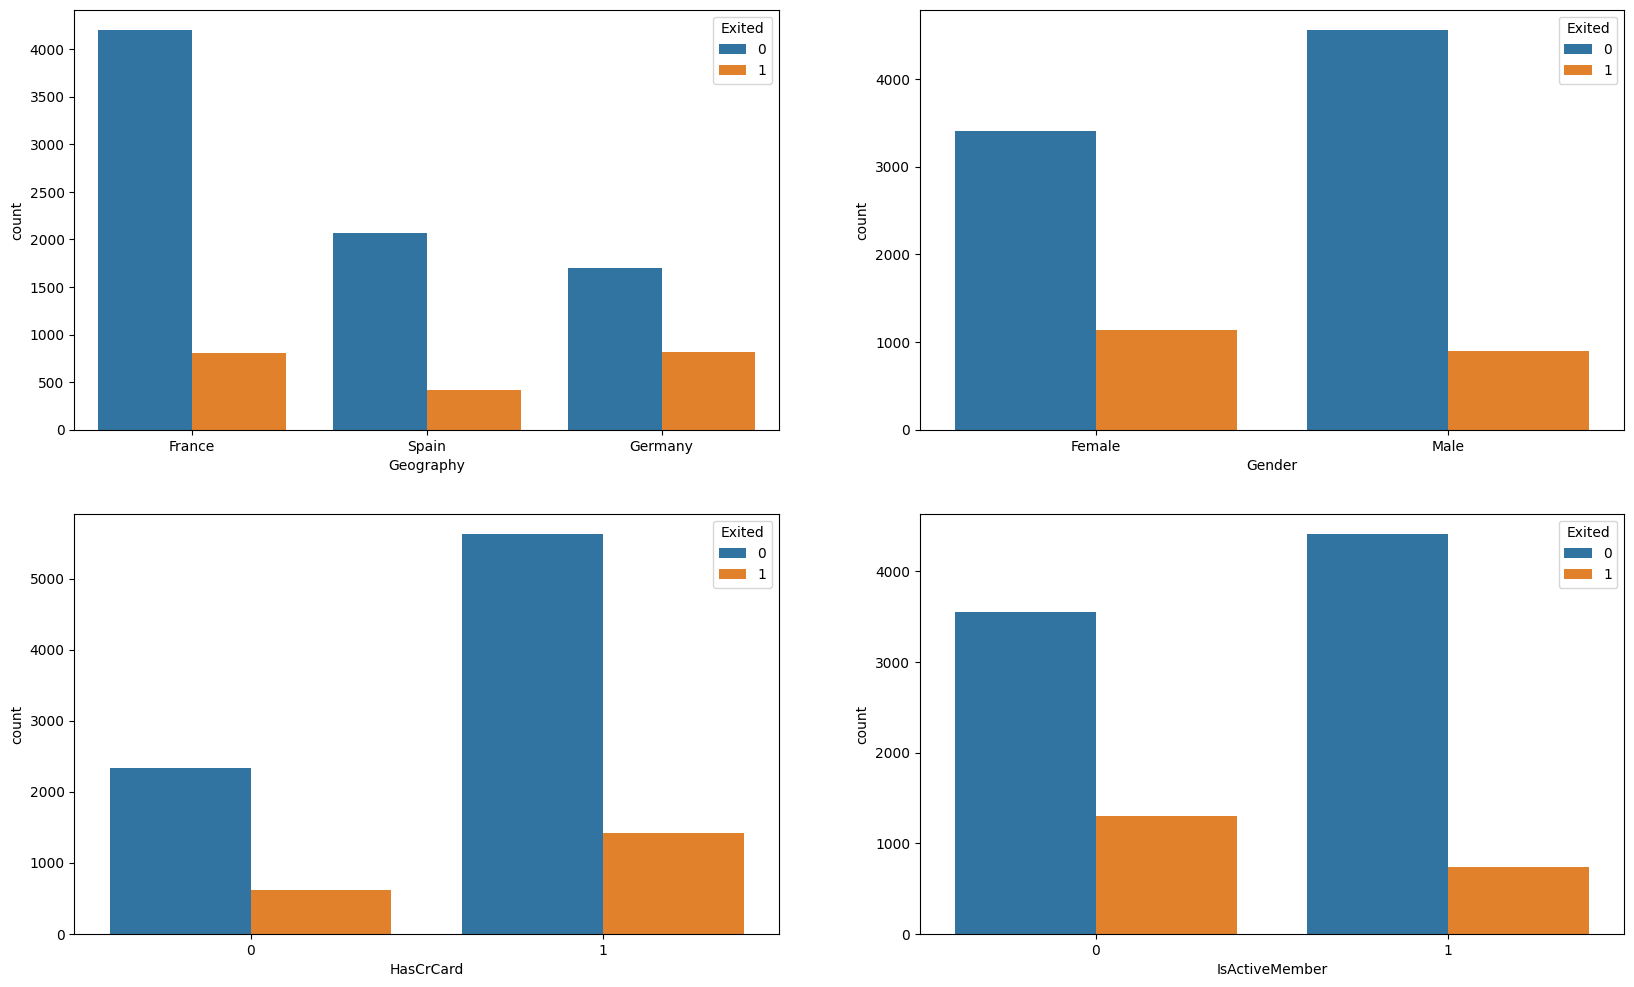

In [78]:
# Hubungan Nasabah Churn dengan Variabel Kategori
fig, axarr = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x='Geography', hue = 'Exited', data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax=axarr[1][1])

Note:

* Berdasarkan geografi, proporsi nasabah yang keluar (exited) lebih banyak berasal dari German, sedangkan untuk Prancis dan Spanyol cenderung lebih rendah.
* Berdasarkan jenis kelamin, proporsi nasabah yang keluar (exited) lebih banyak Perempuan, dibandingkan dengan laki - laki.
* Berdasrkan kepemilikan Credit Card, proporsi nasabah yang keluar (exited) lebih banyak berasal dari nasabah yang memiliki Credit Card, dibandingkan dengan nasabar yang tidak memiliki Credit Card.
* Berdarkan active member, proporsi nasabah yang keluar (exited) lebih banyak berdarkan nasabah yang sudah di cap tidak aktif, dibandingkan dengan nasabah yang masih aktif.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

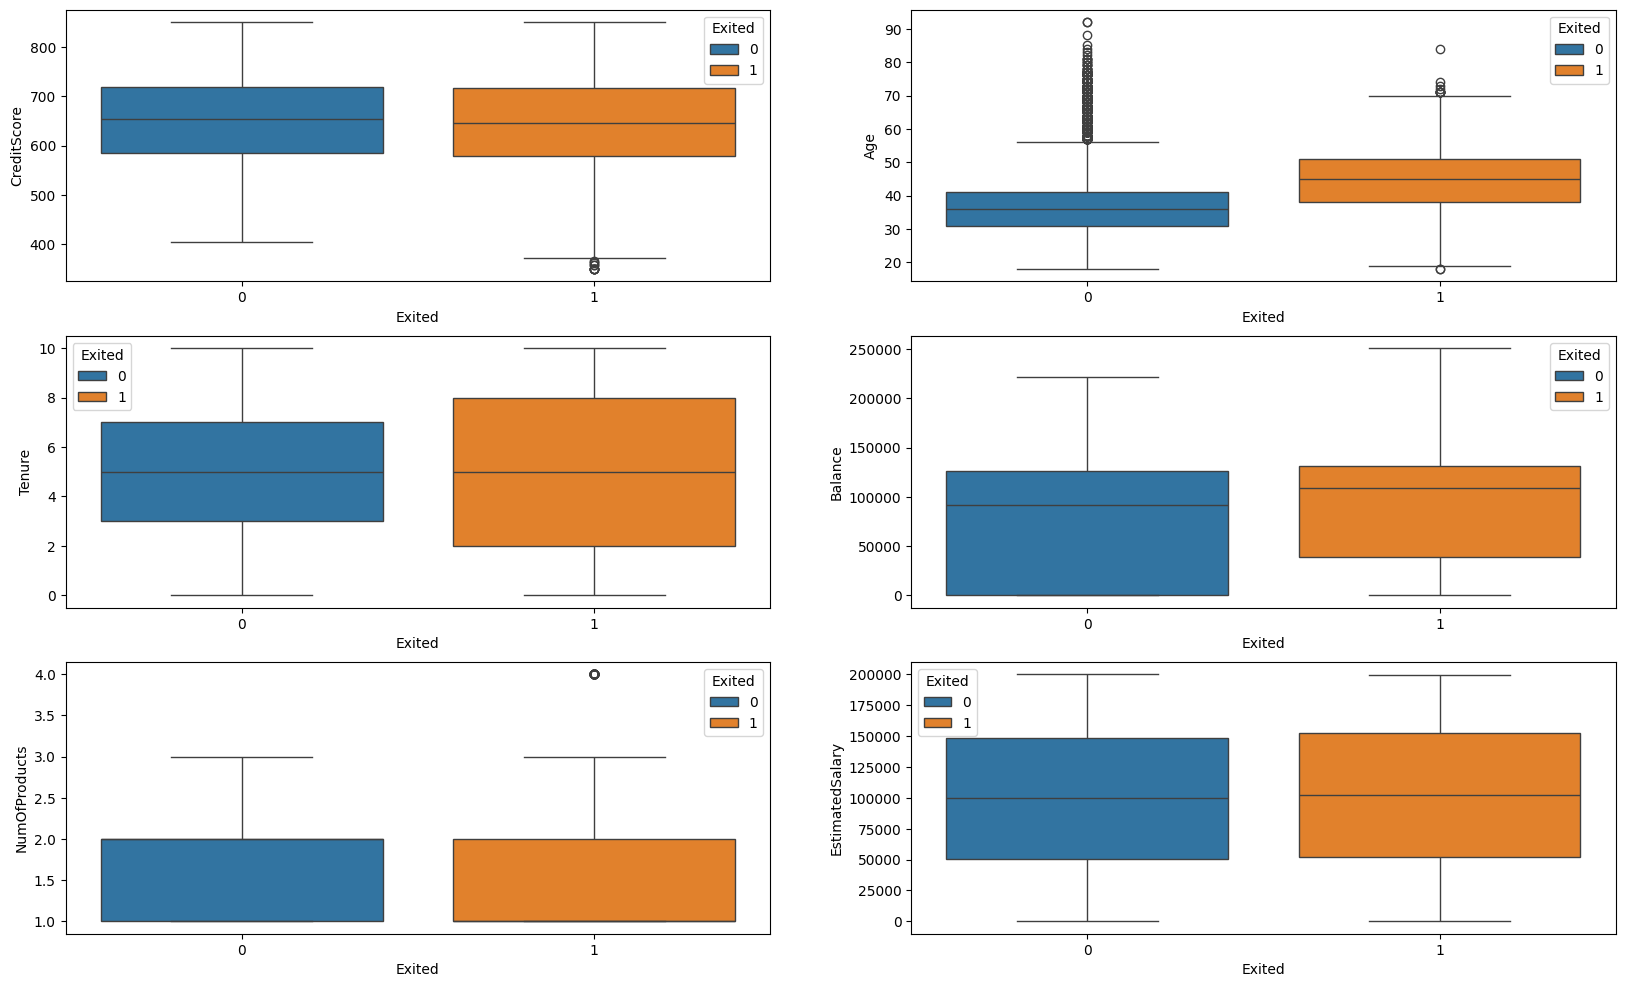

In [79]:
# Hubungan Nasabah Churn dengan Variabel Kontinu
fig, axarr = plt.subplots(3, 2, figsize = (20, 12))
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = axarr[0][0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df, ax = axarr[0][1])
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data = df, ax = axarr[1][0])
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data = df, ax = axarr[1][1])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax = axarr[2][0])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax = axarr[2][1])

* Untuk Credit Score, tidak ada perbedaan yang signifikan antara nasabah exited dan nasabah tidak exited.
* Untuk Umur, nasabah yang exited mayoritas orang orang yang umurnya lebih tua (umur 40 - 60), dibandingkan dengan nasabah yang lebih muda (umur 30 - 40).
* Untuk Tenure, mediannya hampir sama, untuk mayoritas data bereda di selang yang hampir sama.
* Untuk Balance, nasabah exited adalah orang orang yang memiliki balance kecil menengah mayoritasnya.
* Untuk NumOfProduct dan EstimatedSalary tidak terlalu terlihat polanya, hampir sama berdasarkan boxplot.

## Correlation Matrix

<Axes: >

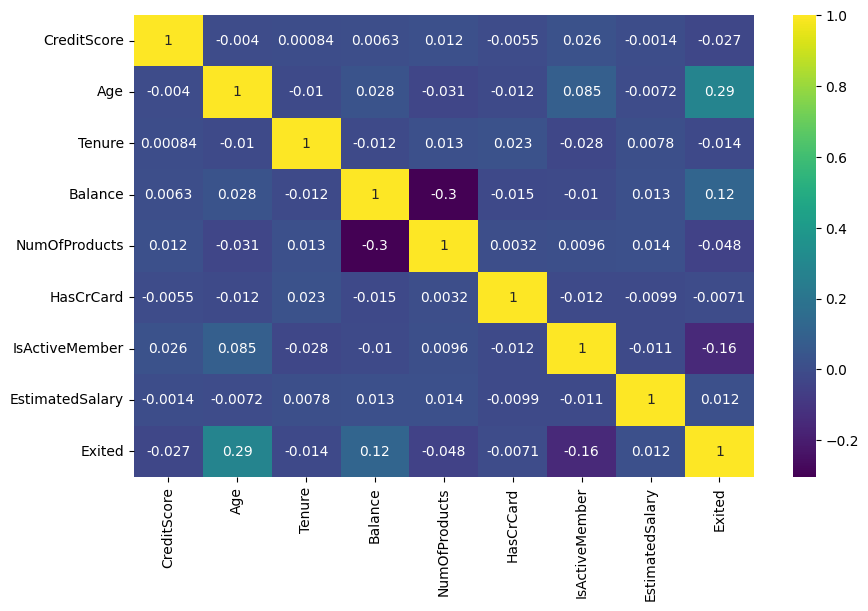

In [80]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

#Nasabah Churn correlation matrix
cm = df_numeric.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

Note :

Dari Correlation Matrix
teresebut dapat dilihat tidak
ada nilai korelasi yang terlalu
besar antara variabel.

<Axes: xlabel='Exited', ylabel='count'>

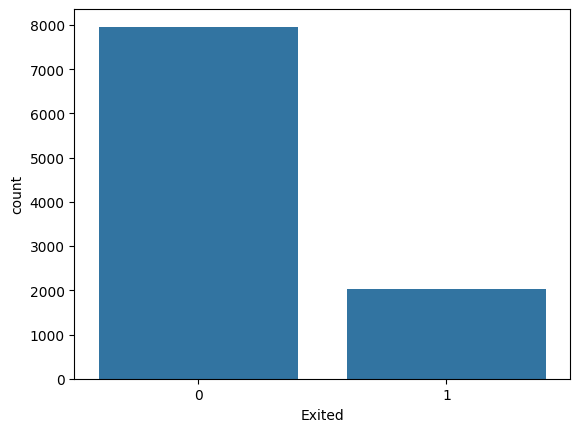

In [81]:
# Plot Nasabanh Churn
sns.countplot(x = 'Exited', data = df)

sekitar 20% dari nasabah telah bergejolak. Sehingga model dasarnya dapat memprediksi bahwa 20% nasabah akan churn. Mengingat 20% adalah angka kecil, kita perlu memastikan bahwa model yang dipilih benar-benar memprediksi dengan sangat akurat 20% ini karena menarik bagi bank untuk mengidentifikasi dan menyimpan kelompok ini sebagai lawan memprediksi secara akurat pelanggan yang dipertahankan. Bisa dilihat ini adalah kasus inbakande, maka nanti akan diatasi dengan menggunakan Resampling menggunakan SMOTE.

#3. Features Engineering

Akan ditambahkan fitur tambahan yang mungkin berdampak pada kemungkinan churning

In [82]:
df_fe = df.copy()

In [83]:
# Belance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance']/df_fe['EstimatedSalary']

# Tenure By Age
df_fe['TenureByAge'] = df_fe['Tenure']/df_fe['Age']

# Credit score given age
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore']/df_fe['Age']

In [84]:
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


#4. Data preparation for model fitting

In [85]:
# One hot encode untuk variabel kategorik
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography','Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [86]:
# minMax scaling untuk variabel kontinu
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [87]:
from sklearn.model_selection import train_test_split

# Split Train, test data
x = df_fe.drop(columns = ['Exited']).copy()
y = df_fe['Exited'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print(len(x_train))
print(len(x_test))

7500
2500


#5. Model fitting and selection

For the model fitting, I will try out the following
* Logistic regression
* KNN
* Ensemble models


In [88]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Fit best Models

In [89]:
# Fit logistic regression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [90]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
# Fit Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## Review best model fit accuracy

In [92]:
y_pred_log = log.predict(x_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2003
         1.0       0.58      0.21      0.31       497

    accuracy                           0.81      2500
   macro avg       0.71      0.59      0.60      2500
weighted avg       0.78      0.81      0.78      2500



In [93]:
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      2003
         1.0       0.56      0.30      0.39       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



In [94]:
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2003
         1.0       0.79      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



dari 3 model yang paling bagus adalah Model Random
Forest Classifier, karena memiliki nilai precision, recall, f1-score
yang paling tinggi dibandinkan dengan 2 model yang lainnya.

In [95]:
def get_auc_scores(y_actual, y_pred, y_proba):
  auc_score = roc_auc_score(y_actual, y_pred);
  fpr_df, tpr_df, _=roc_curve(y_actual, y_proba);
  return (auc_score, fpr_df, tpr_df)


In [96]:
auc_log, fpr_log, tpr_log = get_auc_scores(y,
                                          log.predict(x),
                                          log.predict_proba(x)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y,
                                          knn.predict(x),
                                          knn.predict_proba(x)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y,
                                        rf.predict(x),
                                        rf.predict_proba(x)[:,1])

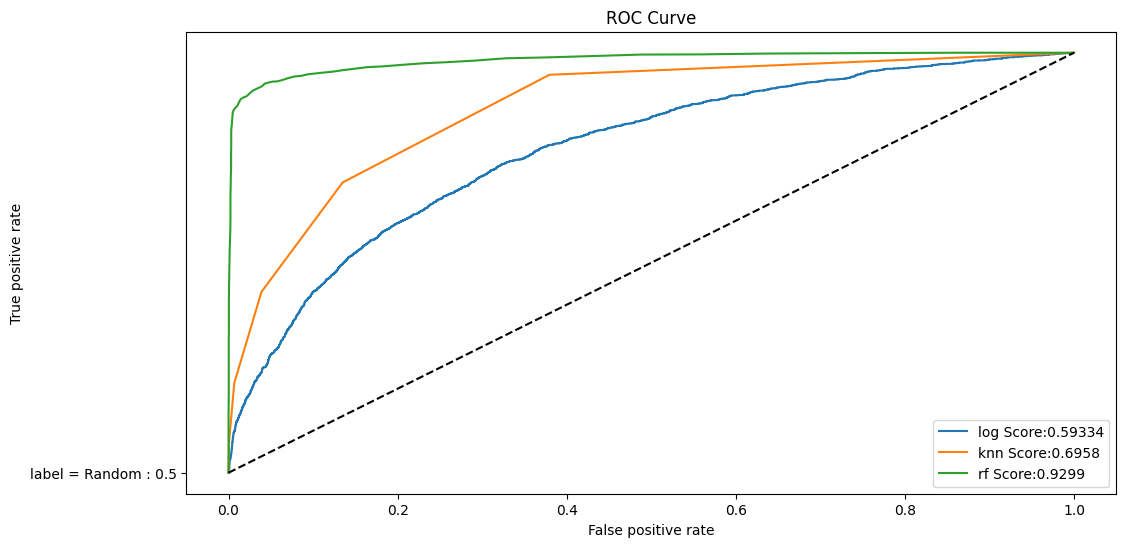

In [97]:
plt.figure(figsize = (12,6), linewidth = 1)
plt.plot(fpr_log, tpr_log, label = 'log Score:' + str(round(auc_log,5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn Score:' + str(round(auc_knn,5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf Score:' + str(round(auc_rf,5)))
plt.plot([0,1], [0,1], 'k--', 'label = Random : 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Kurva Random Forest Classifier adalah
kurva yang paling akurat karena kurva
random forest classifier paling mendekati
sudut kiri atas. Sebaliknya kurva logistic
regression adalah kurva yang paling tidak
akurat karena kurva logistic regression
mendekati diagonal 45 derajat dari ruang
ROC.

##Resampling to handle imbalanced dataset

In [98]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)

In [99]:
y_train.value_counts()

,count
Exited,
0.0,5960
1.0,1540


In [100]:
y_smote.value_counts()

,count
Exited,
1.0,5960
0.0,5960


In [101]:
# Fit Random Forest Classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(x_smote, y_smote)

RandomForestClassifier()

In [102]:
y_pred_smote = rf_smote.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2003
         1.0       0.59      0.59      0.59       497

    accuracy                           0.84      2500
   macro avg       0.75      0.74      0.74      2500
weighted avg       0.84      0.84      0.84      2500



Jika dibandingkan hasil pengujian sebelum
Resampling dengan setelah resampling, resampling yang
dilakukan tidak terlalu meningkatkan prediksi. tetapi resampling
yang dilakukan meningkatkan nilai recall yang menjadi lebih
besar yaitu 0,76 dibandingkan model awal memiliki 0,72. Maka
saya akan memilih model yang baru yang telah di lakukan
resampling karena utk kasus imbalace lebih baik kita mencari
yang nilai recall nya baik.

## Feature Importance

<BarContainer object of 16 artists>

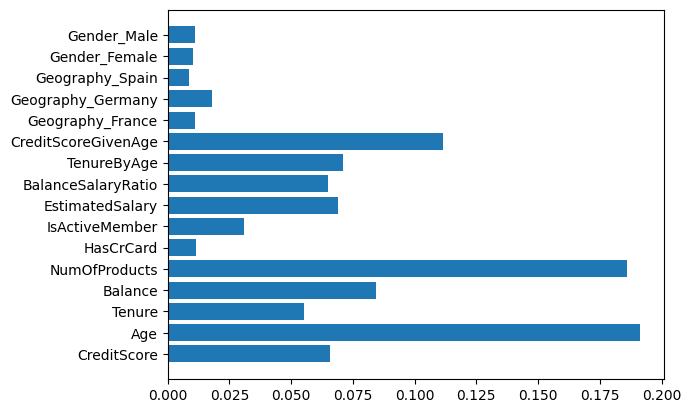

In [103]:
fi = rf_smote.feature_importances_
col = x_train.columns
plt.barh(col, fi)

Dari plot disamping, kita dapat melihat
bahwa variabel 'Age' adalah variabel
yang paling membantu model untuk
membedakan nasabah churn atau
tidak churn.

In [104]:
df.groupby('Exited')['Age'].mean()

,Age
Exited,
0,37.408389
1,44.837997


In [105]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
